In [5]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import glob
import numpy as np
import sys
sys.path.append('../creme/')
import utils
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
pdf_dir = utils.make_dir('pdfs/sufficiency_of_greedy_search_tiles/')
summary_csv_dir = '../results/summary_csvs/enformer/greedy_search'

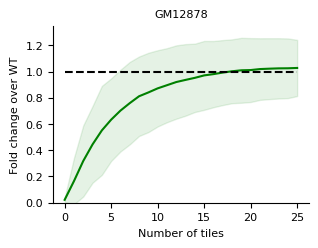

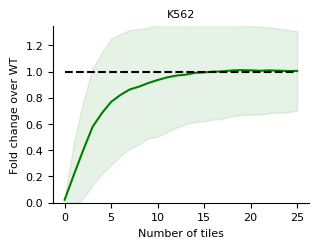

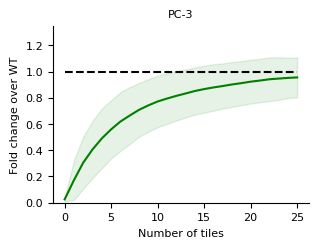

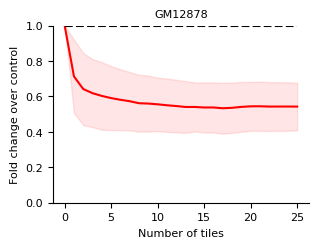

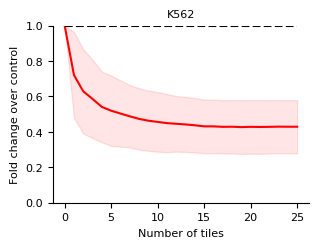

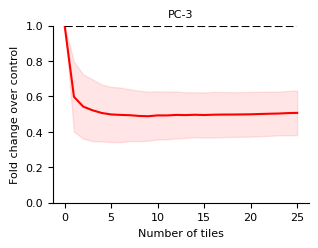

In [19]:
fontsize=8
for greedy_search_type in ['min', 'max']:
    traces = pd.read_csv(f"{summary_csv_dir}/sufficiency_of_greedy_tiles_{greedy_search_type}.csv")
    N_iter = 25+1
    if greedy_search_type == 'min':
        norm = 'WT'
        color = 'g'
    
    elif greedy_search_type == 'max':
        norm = 'control'
        color = 'r'
    
    
    for cell_line, cell_df in traces.groupby('cell_line'):
        
        for context, context_df in cell_df.groupby("context"):
            fig, ax = plt.subplots(1, 1, figsize=[3.3,2.3])
            trace_values = context_df['Normalized TSS activity'].values.reshape((context_df.shape[0]//N_iter, N_iter))
            #ax.plot(trace_values.T, alpha=0.05, c=color)
            mean = trace_values.mean(axis=0)
            std = trace_values.std(axis=0)
            data = trace_values.mean(axis=0)
            ax.plot(mean, c=color)
            ax.fill_between(range(len(data)), mean-std, mean+std, alpha=0.1, color=color)

        
            ax.set_xlabel('Number of CREs added')
            ax.set_ylabel(f'Fold change over {norm}', fontsize=fontsize)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

            plt.setp(ax.get_xticklabels(), fontsize=fontsize)
            plt.setp(ax.get_yticklabels(), fontsize=fontsize)
            plt.xticks(fontsize=fontsize)
            plt.xlabel('Number of tiles', fontsize=fontsize)
            
            if greedy_search_type == 'min':
                plt.ylim(0, 1.35)
                plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1, 1.2], fontsize=fontsize)
            else:
                plt.ylim(0, 1)
                plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=fontsize)

            
            # if greedy_search_type == 'max':
            #     plt.ylim(0,1.1)
            ax.set_title(cell_line, fontsize=fontsize)
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

            ax.hlines(1, 0, 25, color='k', linestyles='--')
            plt.show()
            fig.savefig(f'{pdf_dir}/{cell_line}_{greedy_search_type}_sufficiency.pdf')


In [91]:
greedy_traces = pd.read_csv(f'{summary_csv_dir}/{greedy_search_type}_traces.csv', index_col='Unnamed: 0')

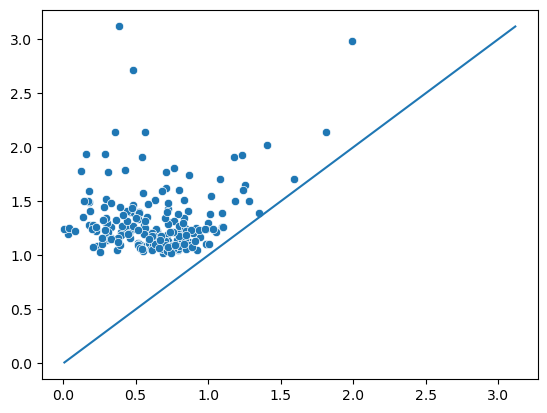

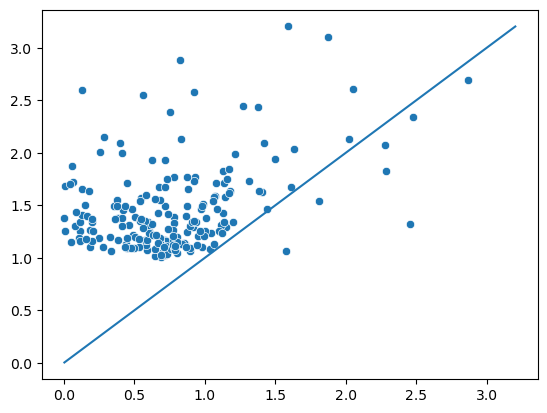

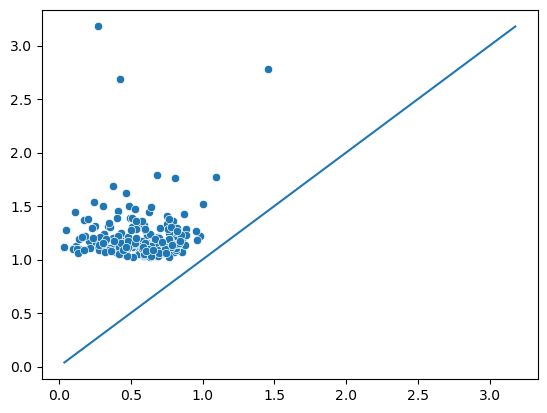

In [132]:
suff_traces = pd.read_csv(f"{summary_csv_dir}/sufficiency_of_greedy_tiles_min.csv")
for cell_line, cell_suff_traces in suff_traces.groupby('cell_line'):
    greedy_preds = []
    suff_preds = []
    cell_greedy_traces = greedy_traces[(greedy_traces['cell_line']==cell_line) & (greedy_traces['context']=='enhancing')]
    for seq_id, suff_df in cell_suff_traces.groupby('seq_id'):
        greedy_df = cell_greedy_traces[cell_greedy_traces['seq_id']==seq_id]
        greedy_preds.append(greedy_df.iloc[5,0])
        suff_preds.append(suff_df.iloc[5,1])
    sns.scatterplot(x=suff_preds, y=greedy_preds)
    min_point, max_point = np.min([np.min(suff_preds), np.min(greedy_preds)]), np.max([np.max(suff_preds), np.max(greedy_preds)])

    plt.plot([min_point, max_point], [min_point, max_point])
    plt.show()

In [120]:
suff_df.iloc[5,1]

0.2707196

,Unnamed: 0,Normalized TSS activity,context,cell_line,seq_id
10400,0,0.006922,enhancing,PC-3,ALDH3B1_chr11_68010326_+
10401,1,0.082136,enhancing,PC-3,ALDH3B1_chr11_68010326_+
10402,2,0.180705,enhancing,PC-3,ALDH3B1_chr11_68010326_+
10403,3,0.270939,enhancing,PC-3,ALDH3B1_chr11_68010326_+
10404,4,0.384958,enhancing,PC-3,ALDH3B1_chr11_68010326_+
...,...,...,...,...,...
15595,21,0.929928,enhancing,PC-3,CGREF1_chr2_27119030_-
15596,22,0.935832,enhancing,PC-3,CGREF1_chr2_27119030_-
15597,23,0.932692,enhancing,PC-3,CGREF1_chr2_27119030_-
15598,24,0.938972,enhancing,PC-3,CGREF1_chr2_27119030_-


In [103]:
greedy_traces[greedy_traces['seq_id']=='ZNF799_chr19_12401268_-'].iloc[5, 0]

,trace,hypothetical_trace,sorted_effects,cell_line,context,seq_id
0,1.000000,1.000000,0.173294,K562,silencing,ZNF799_chr19_12401268_-
1,1.179007,1.173294,0.125017,K562,silencing,ZNF799_chr19_12401268_-
2,1.279872,1.298311,0.067935,K562,silencing,ZNF799_chr19_12401268_-
3,1.377691,1.366246,0.044634,K562,silencing,ZNF799_chr19_12401268_-
4,1.887753,1.410880,0.082527,K562,silencing,ZNF799_chr19_12401268_-
5,2.298182,1.493407,-0.135550,K562,silencing,ZNF799_chr19_12401268_-
6,2.627122,1.357857,-0.104742,K562,silencing,ZNF799_chr19_12401268_-
7,2.956231,1.253115,0.020569,K562,silencing,ZNF799_chr19_12401268_-
8,3.290511,1.273683,0.059773,K562,silencing,ZNF799_chr19_12401268_-
9,3.489883,1.333457,0.054540,K562,silencing,ZNF799_chr19_12401268_-
